# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import matplotlib as mpl

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [10]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [14]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

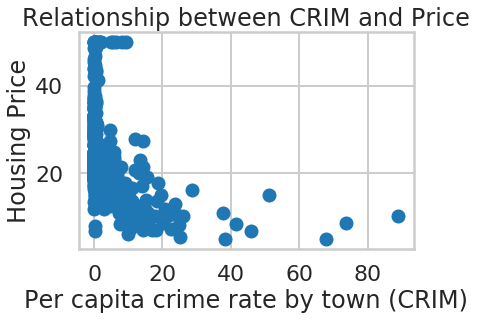

In [15]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship
There is no direct negative relationship between housing price and crime rate, but we can observe that housing prices are high as the crime rate reduces. Similarly, as crime rate increases to 40 and above, the house of prices go down. There could be some outliers, but its not visslbe from a scatter plot. We should do a box-plot to detect those. 

Text(0.5, 1.0, 'Relationship between RM and Price')

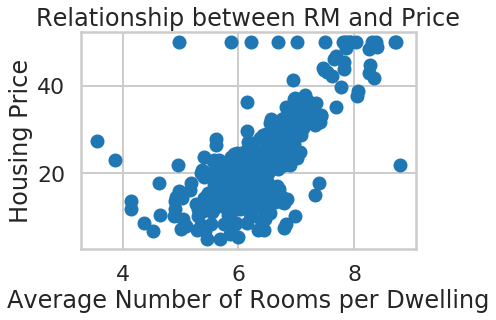

In [16]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Here, we see a direct positive relationship between average number of rooms per dwelling unit and the housing prices. As the number of dwelling units go up, the cost of the house also increases.

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

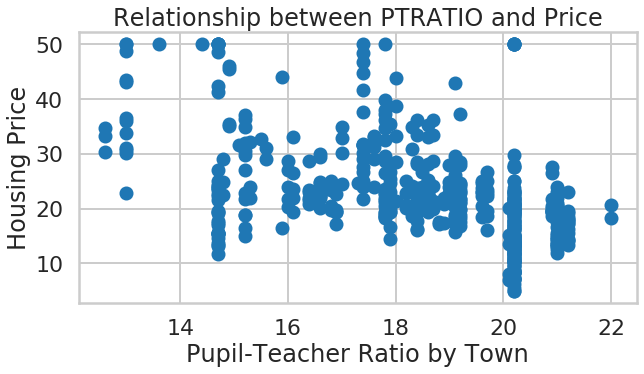

In [17]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize = (10,5))
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.ylabel("Housing Price")
plt.xlabel("Pupil-Teacher Ratio by Town")
plt.title("Relationship between PTRATIO and Price")

Here, we don't see an an obvious relationship between Pupil-Teacher ratio and the cost of houses. 

Text(0.5, 1.0, 'Relationship between NOX Concentration and Price')

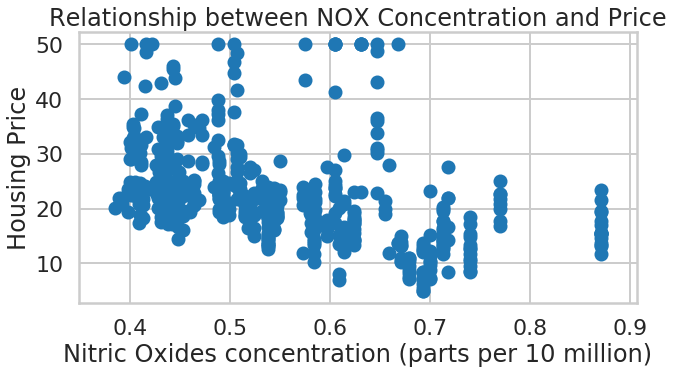

In [18]:
# your turn: create some other scatter plots
# Scatter plot between NOX and PRICE
plt.figure(figsize = (10,5))
plt.scatter(bos.NOX, bos.PRICE)
plt.ylabel("Housing Price")
plt.xlabel("Nitric Oxides concentration (parts per 10 million)")
plt.title("Relationship between NOX Concentration and Price")

There is a negative linear relationship between housing price and NOX concentration. As the concentration increases, the cost of house reduces

Text(0.5, 1.0, 'Relationship between NOX Concentration and Price')

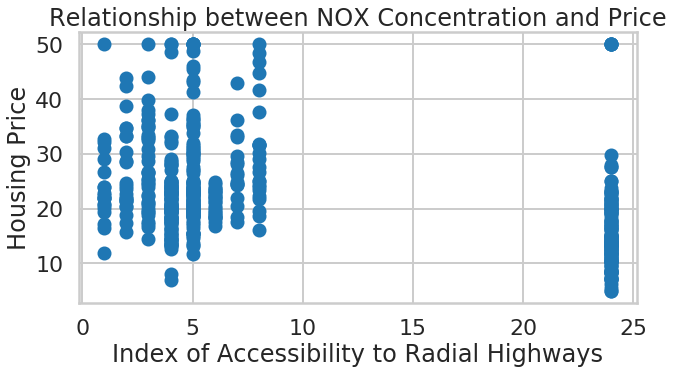

In [19]:
# Scatter plot between RAD and PRICE
plt.figure(figsize = (10,5))
plt.scatter(bos.RAD, bos.PRICE)
plt.ylabel("Housing Price")
plt.xlabel("Index of Accessibility to Radial Highways")
plt.title("Relationship between NOX Concentration and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

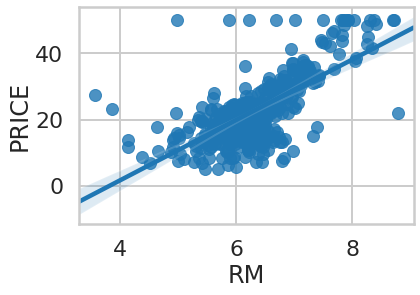

In [20]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

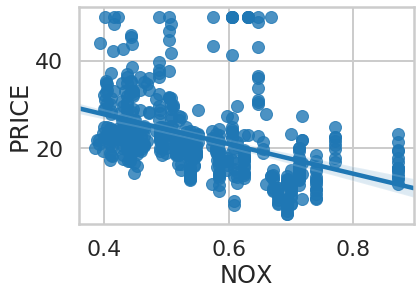

In [21]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)

[(0, 54.191929487106655)]

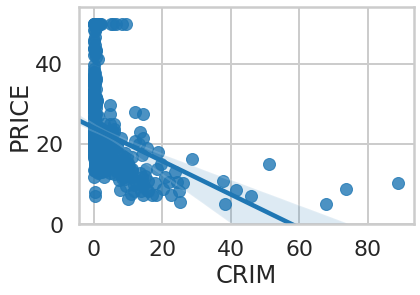

In [22]:
g = sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
g.set(ylim=(0, None))

### Histograms
***


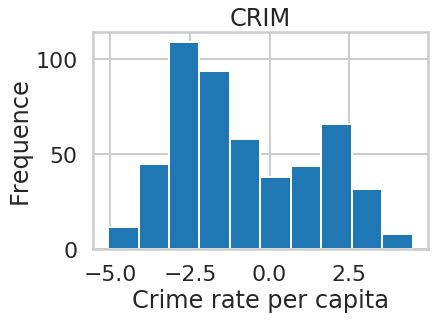

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequence")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

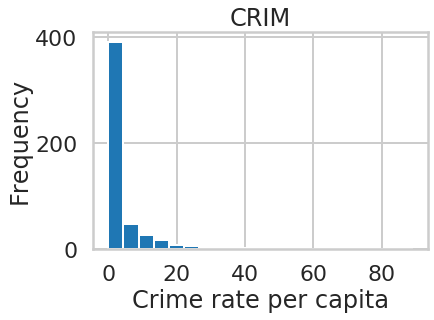

In [24]:
#your turn
### Plotting histogram of Crime data without Transformation

plt.hist(bos.CRIM, bins = 20)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

The issue with plotting a histogram <b> without </b> a log transformation is the data is right skewed, indicating that there are a lot of data points with low crime data in the range of 0-10, that is skewing the dataset. Here, the data seems to follow a log-normal distribution (skewed shaped) and hence we take the log transformation of each data point to make the transformed distribution a normal or near-normal distribution. 

By taking the lot transformation, you get a better idea of the spread of the data where the CRIM rate is < 20%. You can also detect any outliers in this range. 


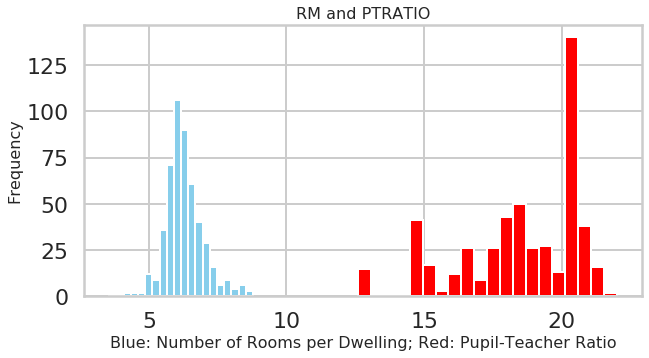

In [25]:
#your turn
#Plotting histogram of number of rooms and pupil-teacher ratio
plt.figure(figsize = (10,5))
plt.hist(bos.RM, bins = 20, color='skyblue')
plt.title("RM and PTRATIO", fontsize = 16)
plt.hist(bos.PTRATIO, bins = 20, color='red')
plt.xlabel("Blue: Number of Rooms per Dwelling; Red: Pupil-Teacher Ratio", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)

plt.show()



#sns.distplot( bos["RM"] , color="skyblue", label="Number of Rooms per Dwelling Unit")
#sns.distplot( bos["PTRATIO"] , color="red", label="Pupil-Teacher Ratio")


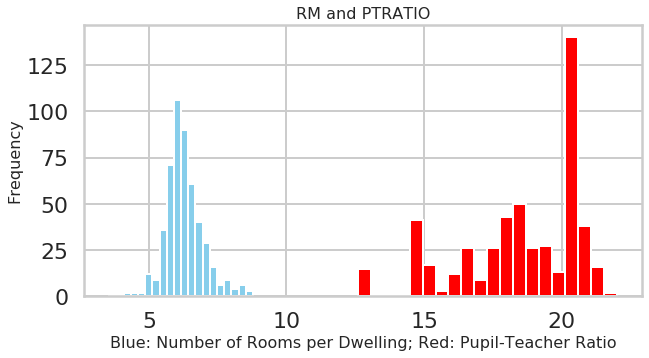

In [26]:
#your turn
### Plotting histogram of Number of Rooms and Pupil-Teacher Ratio
plt.figure(figsize = (10,5))
plt.hist(bos.RM, bins = 20, color='skyblue')
plt.title("RM and PTRATIO", fontsize = 16)
plt.hist(bos.PTRATIO, bins = 20, color='red')
plt.xlabel("Blue: Number of Rooms per Dwelling; Red: Pupil-Teacher Ratio", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)

plt.show()




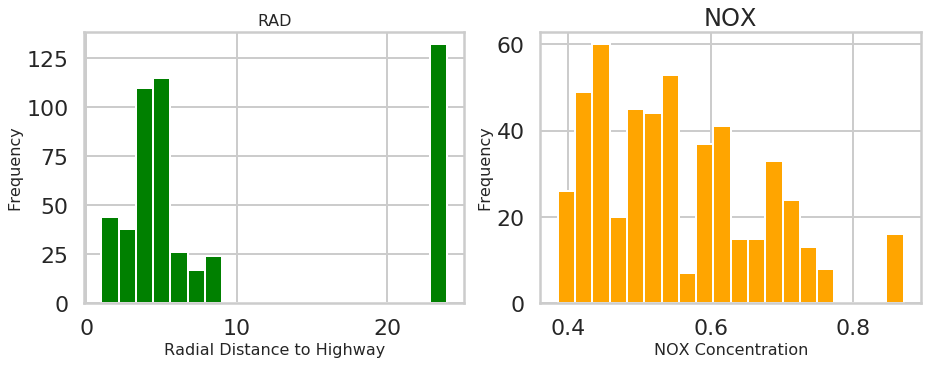

In [27]:
### Plotting histogram of Nox Concentration and Radial Distance to Highway
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(bos.RAD, bins = 20, color='green')
plt.xlabel("Radial Distance to Highway", fontsize = 16)
plt.title("RAD", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)

plt.subplot(1,2,2)
plt.hist(bos.NOX, bins = 20, color='orange')
plt.xlabel("NOX Concentration", fontsize = 16)
plt.title("NOX")
plt.ylabel("Frequency", fontsize = 16)

plt.show()




## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.49e-74
Time:                        19:52:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Actual House Prices vs. Predicted Prices using statsmodel')

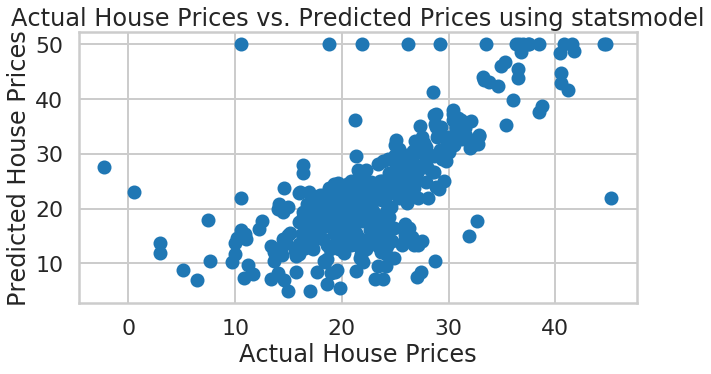

In [30]:
# your turn
plt.figure(figsize = (10,5))
plt.scatter(m.fittedvalues, bos.PRICE)
plt.ylabel('Actual House Prices')
plt.xlabel('Predicted House Prices')
plt.title('Actual House Prices vs. Predicted Prices using statsmodel')

The graph seems to follow a farily linear positive trend, but there are some actual house prices that are capped at $\$50,000$. This could be because some of the house prices were capped at that price. 

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
dir(lm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


# your turn
  -   To fit a model without the intercept term, we have to set <b> fit_intercept = False </b>. Fitting a model without an intercept is also known as regression through the origin. Dropping the intercept term is only useful if you have X= 0, y=0 as a data point in your sample. I would not recommend dropping the intercept as it can reduce the model's fit to data. Leaving out the intercept term also increases your degree of freedom by 1, and it really has no advantages unless the sample size is extremely small.
  
  
  -  To satisy the criterion of residuals being i.i.d (independent and identically distributed) - 
     -  Independent: A residual should not be related to another residual. 
     -  Identical: Residuals should have a normal distribution i,e, ~ N(0,$\sigma^2$). Each residual should be sampled from the same normal distribution, with a mean zero and same variance throughout. 
     
  -  <b> False </b>. Y need not be normally distributed for linear regression. Only the error terms after modeling, should be normal to draw a valid conclusion by hypothesis testing.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

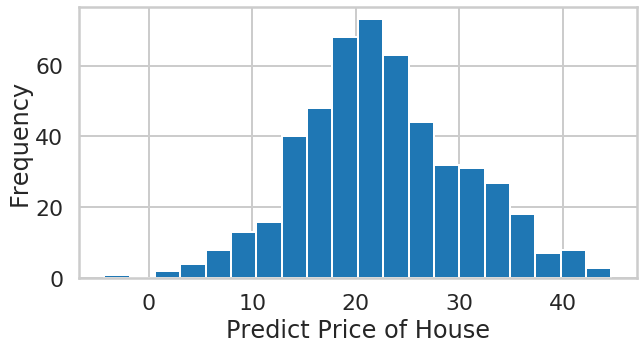

In [361]:
# your turn
plt.figure(figsize = (10,5))
plt.hist(lm.predict(X), bins = 'auto')
plt.xlabel('Predict Price of House')
plt.ylabel('Frequency')
plt.show()

In [362]:
from scipy import stats
stats.describe(lm.predict(X))

DescribeResult(nobs=506, minmax=(-4.281310709184851, 44.67308338731341), mean=22.532806324110677, variance=62.64853631101991, skewness=0.11071842432057091, kurtosis=0.10343116979610922)

  -  The shape of the histogram follows a normal distribution, and most of the houses are centered around a cost of $\$22,000$. The data looks to be slightly skewed to the right, with a few possible outliers in the range of $\$35,000$ and above, but we don't have to make any adjustments. The reason for this could be a high housing price due to some additional features that we are not considering. 

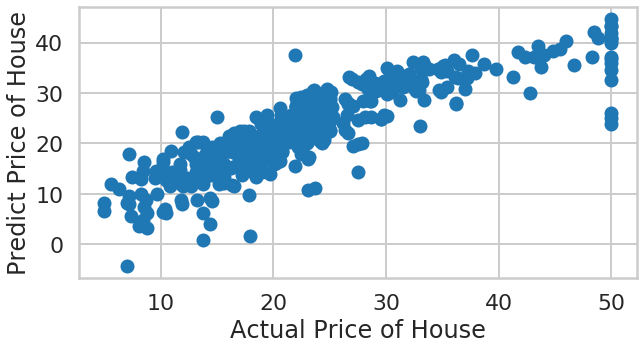

In [363]:
# your turn
plt.figure(figsize = (10,5))
plt.scatter(bos.PRICE, lm.predict(X))
plt.ylabel('Predict Price of House')
plt.xlabel('Actual Price of House')
plt.show()

Once again, similar to the scatterplot with predicted values using statsmodel, all the predicted house prices are capped at $\$50,000$

 -  Scikit-learn advantages: 
         - Easy to implement
         - Higher accuracy
         - Better suited for machine learning with emphasis on predictive modeling
         - Can do cross-validation for prediction
 -  Scikit learn disadvantages: 
         -  Does not provide data on statistical significance of p-value
 -  statsmodel advantages: 
         - Detailed output summary report on each parameter
         - Better suited for traditional statistical analysis and how well a given model fits a data   
 -  statsmodel disadvantages: 
         - Implementation is more complex (i.e. we need to specify each predictor variable)

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [39]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [40]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<b> <font size = 4> Relationship between PTRATIO and housing price using statsmodel </b> </font>

In [42]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.61e-34
Time:                        20:04:49   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [56]:
### Model R2 using statsmodel
print("R2 using statsmodel is is {}".format(m2.rsquared))
print("The R2 tells us that the correlation between house prices and PTRATIO is pretty low. ")


R2 using statsmodel is is 0.257847318009223
The R2 tells us that the correlation between house prices and PTRATIO is pretty low. 


In [52]:
## Coefficient and Intercept
print("Coefficient of linear regression model using statsmodel is {}".format(m2.params[1]))
print("Intercept of linear regression model using statsmodel is {}".format(m2.params[0]))


Coefficient of linear regression model using statsmodel is -2.1571752960609656
Intercept of linear regression model using statsmodel is 62.34462747483265


In [60]:
### F-statistic
print("F statistic using statsmodel is {}".format(m2.fvalue))

print("The p-value using stats is {}".format(m2.f_pvalue))


print("The F-statistic and the p-value provides an indication of how well the linear regression model fits the data. The low p-value indicates there is a correlation between the predicted prices predicted using PT-RATIO and the actual prices. ")

F statistic using statsmodel is 175.1055428756955
The p-value using stats is 1.6095094784729786e-34
The F-statistic and the p-value provides an indication of how well the linear regression model fits the data. The low p-value indicates there is a correlation between the predicted prices predicted using PT-RATIO and the actual prices. 


<b> <font size = 4> Relationship between PTRATIO and housing price using scikit-learn Linear Regression </b> </font>

Coefficient of linear regression model using Scikit-learn is [-2.1571753]
Intercept of linear regression model using Scikit-learn is 62.34462747483266


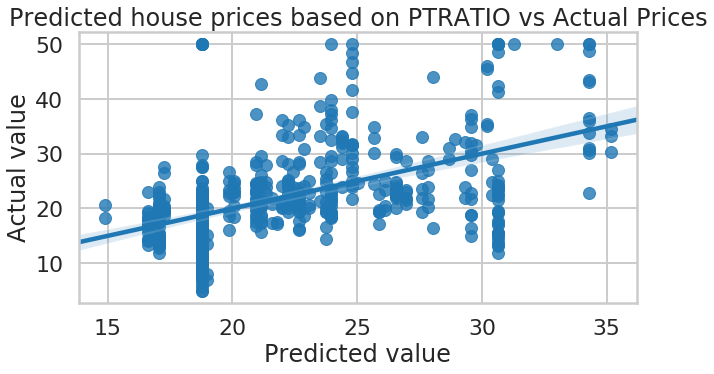

In [51]:
# your turn

# First instantiate a linear regression model
lreg = LinearRegression()

#reshape PTRATIO
pt_ratio= bos.PTRATIO.values.reshape(-1,1)

#Fit the model
lreg.fit(pt_ratio, bos.PRICE)

#Predict the cost of houses
lreg_predict = lreg.predict(pt_ratio)

#Plotting the data
plt.figure(figsize = (10,5))
sns.regplot(lreg_predict, bos.PRICE)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted house prices based on PTRATIO vs Actual Prices")



## Coefficient and Intercept
print("Coefficient of linear regression model using Scikit-learn is {}".format(lreg.coef_))
print("Intercept of linear regression model using Scikit-learn is {}".format(lreg.intercept_))


In [367]:
## Calculating R2 value
r2 = lreg.score(pt_ratio, bos.PRICE)
print("The model R^2 value is {}".format(r2))

The model R^2 value is 0.257847318009223


The R2 tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model. In this case, 26% of the variance in the price is explained by the model. 

In [54]:
## Computing the F statistic

#N is the number of observations
N = len(pt_ratio)

#K is the number of variables
K = len(lreg.coef_)+1

#F Statistic is calcualted as MSR/MSE
## MSR = RSS/(N-K)
RSS = np.sum((bos.PRICE - lreg_predict) ** 2) #Residual sum of squares
MSR = RSS/(N-K)


#MSE = ESS/(K-1)
ESS = np.sum((lreg_predict - np.mean(bos.PRICE)) ** 2) #Explained sum of squares
MSE = ESS/(K-1)


F = MSE/MSR


#p value using f test
p = stats.f.sf(F, K-1, N-K)

print("F statistic using scikit-learn is is {}".format(F))
print("The p-value using scikit-learn is is {}".format(p))

F statistic using scikit-learn is is 175.10554287569542
The p-value using scikit-learn is is 1.609509478473047e-34


The low p-value indicates that the model is statistically significant i.e. there is a correlation between the predicted prices predicted using PT-RATIO and the actual prices. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

<b> <font size = 4> Relationship between PTRATIO, CRIM an CRM and housing price using statsmodel </b> </font>

In [69]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 11 May 2020   Prob (F-statistic):           6.15e-98
Time:                        23:14:10   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [65]:
### F-statistic
print("F statistic using statsmodel is {}".format(m3.fvalue))

print("The p-value using stats is {}".format(m3.f_pvalue))

print("The F-statistic is very high, and the p-value is low indicating that we can reject the null hypothesis i.e., the regression coefficients are statistically significant.")



F statistic using statsmodel is 245.16449030064618
The p-value using stats is 6.150435026237366e-98
The F-statistic is very high, and the p-value is low indicating that we can reject the null hypothesis i.e., the regression coefficients are statistically significant.


In [67]:
### Model R2 using statsmodel
print("R2 using statsmodel is is {}".format(m3.rsquared))
print("The R2 tells us that the correlation between house prices and PTRATIO, CRIM and RM is high. The R2 value is higher than the first model we experimented, with just PTRATIO. ")


R2 using statsmodel is is 0.5943412940723471
The R2 tells us that the correlation between house prices and PTRATIO, CRIM and RM is high. The R2 value is higher than the first model we experimented, with just PTRATIO. 


<b>Which variables in the model are significant in predicting house price? </b>
The p-value for CRIM, RM And PTRATIO are all below the level of significance of 0.005 indicating that there is a strong evidence of a linear association between house price and each of these three variables. Based on the value of the correlation coefficient, we see that cost of a house has a negative relationship with Crime rate and pupil-teacher ratio, while it has a positive relationship with the number of rooms. 

<b> <font size = 4> Relationship between PTRATIO, CRIM an CRM and housing price using scikit-learn </b> </font>

In [369]:
# your turn

## Create the X variable
X3 = X[['CRIM','PTRATIO', 'RM']]

# Instantiate a linear regression model
lreg3 = LinearRegression()


#Fit the model
lreg3.fit(X3, bos.PRICE)

#R2 value of model
r2_lreg3 = lreg3.score(X3, bos.PRICE)
print("Model R2 is {}".format(r2_lreg3))

## Computing the F statistic

#N is the number of observations
N = len(X3)

#K is the number of variables
K = len(lreg3.coef_)


# Calculate F statistic
F_lreg3 = (r2_lreg3/(1-r2_lreg3))*((N-K-1)/K)
print('F statistic is {}'.format(F_lreg3))

#p-value
p_lreg3 = stats.f.sf(F_lreg3, K-1, N-K)
print('p-value is {}'.format(p_lreg3))





Model R2 is 0.5943412940723471
F statistic is 245.16449030064626
p-value is 4.736221529487856e-75


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

<b> <font size = 4> Comparing Models using statsmodel </b> </font>

In [75]:
m5 = ols('PRICE ~ CRIM + RM + PTRATIO + RAD + NOX', bos).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 11 May 2020   Prob (F-statistic):          5.44e-102
Time:                        23:30:16   Log-Likelihood:                -1596.9
No. Observations:                 506   AIC:                             3206.
Df Residuals:                     500   BIC:                             3231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9630      4.788      2.081      0.0

In [78]:
# Calculate R2 for both models

print("Model R2 for the full model using statsmodel is {}".format(m5.rsquared))
print("Model R2 for the reduced model using statasmodel is {}".format(m3.rsquared))

Model R2 for the full model using statsmodel is 0.6178057333857204
Model R2 for the reduced model using statasmodel is 0.5943412940723471


In [79]:
# Calculate F statistic for both models

print("F-Statistic for the full model using statsmodel is {}".format(m5.fvalue))
print("F-Statistic for the reduced model using statasmodel is {}".format(m3.fvalue))

F-Statistic for the full model using statsmodel is 161.64704375568934
F-Statistic for the reduced model using statasmodel is 245.16449030064618


In [81]:
# Calculate AIC for both models
AIC_full = m5.aic
AIC_reduced = m3.aic
print("The AIC for the full model is {}".format(AIC_full))
print("The AIC for the reduced model is {}".format(AIC_reduced))

The AIC for the full model is 3205.796049847734
The AIC for the reduced model is 3231.945123544996


<b> <font size = 4> Comparing Models using scikit-learn </b> </font>

In [83]:
# Adding NOx and RAD to the model

## Create the X variable
X5 = X[['CRIM','PTRATIO', 'RM', 'NOX','RAD']]
X3 = X[['CRIM','PTRATIO','RM']]

# Instantiate a linear regression model
lreg_full = LinearRegression()
lreg_reduced = LinearRegression()

#Fit the model
lreg_full.fit(X5, bos.PRICE)
lreg_reduced.fit(X3, bos.PRICE)



#R2 value of model
r2_full = lreg_full.score(X5, bos.PRICE)
r2_reduced = lreg_reduced.score(X3, bos.PRICE)

print("Model R2 for the full model is {}".format(r2_full))
print("Model R2 for the reduced model is {}".format(r2_reduced))

## Computing the F statistic
RSS_reduced = np.sum((bos.PRICE - lreg_reduced.predict(X3)) ** 2) #Residual sum of squares
RSS_full = np.sum((bos.PRICE - lreg_full.predict(X5)) ** 2) #Residual sum of squares

#N is the number of observations
N = len(bos.PRICE)


#K is the number of variables
K_full = len(lreg_full.coef_)
K_reduced = len(lreg_reduced.coef_)



# Calculating DF
DF_full = N - K_full - 1
DF_reduced = N - K_reduced - 1

# F-statistic to compare models
F_num = (RSS_reduced - RSS_full)/(DF_reduced - DF_full)
F_den = (RSS_full)/(DF_full)
F = F_num/F_den
print("F-statistic for model comparison is {}".format(F))

#p-value for F-statistic
P_comparison = stats.f.sf(F, DF_reduced-DF_full, DF_full)
print(P_comparison)
print("p-value for model comparison is {}".format(P_comparison))




Model R2 for the full model is 0.6178057333857204
Model R2 for the reduced model is 0.5943412940723471
F-statistic for model comparison is 15.348502949322269
3.395015243973981e-07
p-value for model comparison is 3.395015243973981e-07


Comparing the AIC of the full and reduced model, the AIC of the full model is lower indicating that the full model may be a better fit for the data. The R$^{2}$ of the full model is also 0.617 > 0.594 for the reduced model. The resulting F statistic is 15.34, with an extremeley small p-value indicates that we can reject the null hypothesis that the full and reduced model perform exactly the same. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

/home/shridhar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1080x360 with 0 Axes>

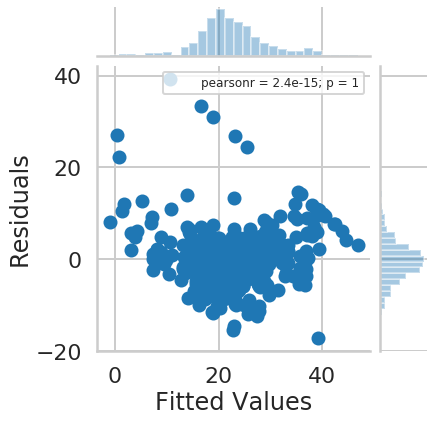

In [371]:
# Your turn.
plt.figure(figsize = (15,5))
j = sns.jointplot(lm3_ols.fittedvalues, lm3_ols.resid, kind='scatter').set_axis_labels('Fitted Values','Residuals')
j.annotate(stats.pearsonr, loc='upper right', fontsize = 12)
plt.show()

The fitted values vs residual pltos tells us that both the variables follow a fairly-normal distribution. A histogram of the fitted values shows that the data may be right-skewed a little. The scatterplot shows us the presence of outliers:
  -  There is one fitted value with negative cost for the house, which seems strage.
  -  Some house prices where the residuals are really high (i.e. >20) and some where the residuals are low but the predicted values are high. 

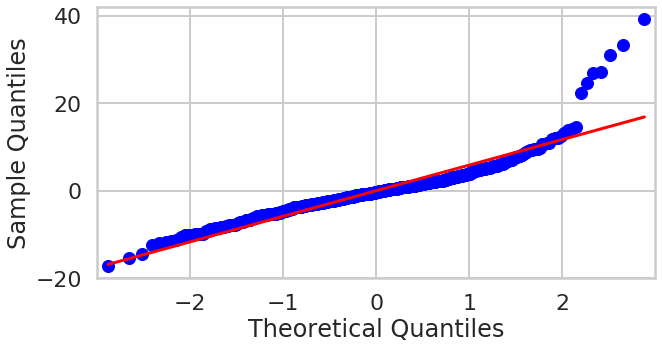

In [372]:
#Quantile plot of residual
with mpl.rc_context():
        mpl.rc("figure", figsize=(10,5))
        sm.qqplot(lm3_ols.resid, line='s')
plt.show()

The Q-Q plot above indicates that the residuals follow a farily normal distribution since most of the residuals lie along the line. However, there are some points towards the top right corner that are outliers diverging from the theoretical distribution and these outliers could indicate the points where the actual cost of the house was fixed at a particular value. Thus, the large value for residuals could be because of the large difference between the predicted value from the reduced model and the actual observec cost of the house. 

<b> Advantages of fitted vs. residual and quantile plot compared to each other </b>

  -  The use of jointplot for fitted vs residuals show how each individual variable is distibued, especially the residuals.  
  - The quantile plot clearly indicates the presence of outliers in the data and how the residuals diverge from the theoretical normal. 


<b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent. </b>
The outliers are located on the top right corner of the plot and these outliers indicate values that there are some points with high residuals i.e large different betweem the predicted and observed house prices. One reason for this could be because, we noticed that some of the house prices were fixed at $\$50,000$ and the predicted value for these houses may have been much lower. 

<b> Construct a leverage plot and identify high leverage points in the model.  </b>

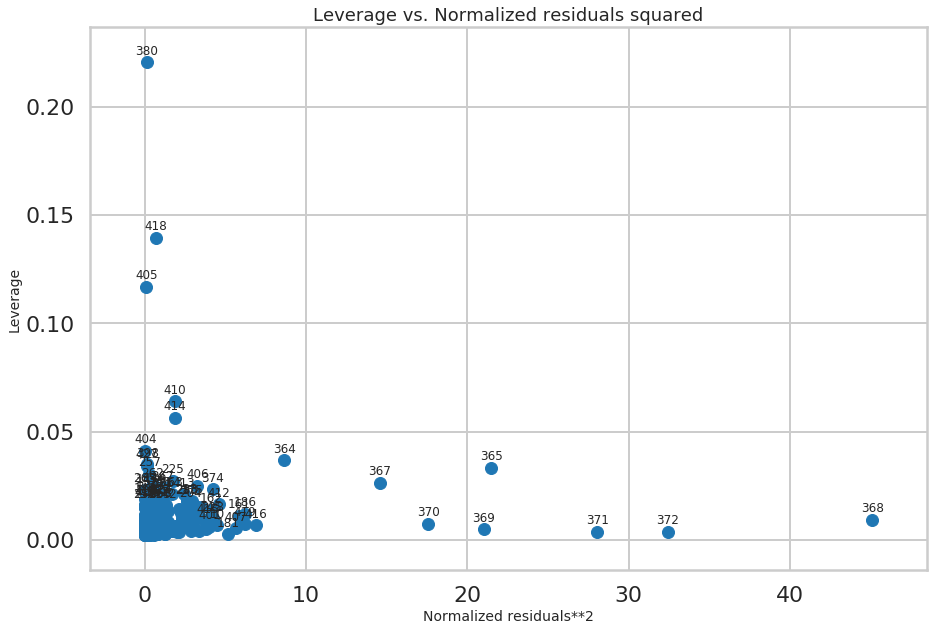

In [373]:
#fig, ax = plt.subplots(1, 1,figsize=(10,5))

mpl.rcParams.update({'font.size': 10})
mpl.rcParams.update({'axes.labelsize': 14})
mpl.rcParams.update({'axes.titlesize': 18})

with mpl.rc_context():
    mpl.rc("figure", figsize=(15,10))
    sm.graphics.plot_leverage_resid2(lm3_ols)
plt.show()

Based on the leverage plot, the ouliers do not seem to have much influence the regression model. The points that have a leverage >0.05 have a squared error close to 0. Similarly, the plots that have squared error above 10 also have leverage < 0.05, indicating that these extreme values don't have much influence on the model.  These extreme values likely have low leverage because they are the expensive homes that are estimated to have mid-range prices, i.e., they have large y values, but moderate x values when predicted prices are plotted against actual prices. 

<b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change? </b>

In [374]:
## Identify the indices that need to be dropped

drops = [380,418,405,410,414,364,367,370,369,365,371,372,368]
X3_clean= X3.drop(drops)
PRICE_clean = bos.PRICE.drop(drops)

# Instantiate a linear regression model
lreg_clean = LinearRegression()


#Fit the model
lreg_clean.fit(X3_clean, PRICE_clean)

#R2 value of model
r2_clean = lreg_clean.score(X3_clean, PRICE_clean)
print("R2 for the model after removing outliers and leverage points is {}".format(r2_clean))

## Computing the F statistic

#N is the number of observations
N = len(X3_clean)

#K is the number of variables
K = len(lreg_clean.coef_)


# Calculate F statistic
F_clean = (r2_clean/(1-r2_clean))*((N-K-1)/K)
print('F statistic for the model after removing outliers and leverage points is {}'.format(F_clean))

#p-value
p_clean = stats.f.sf(F_clean, K-1, N-K)
print('p-value for the model after removing outliers and leverage points is {}'.format(p_clean))



#### Calculating the AIC for the model by fitting a linear regression using statsmodel
lm3_ols_clean = ols('PRICE ~ CRIM + RM + PTRATIO', bos.drop(drops)).fit()


# Calculate AIC for both models
AIC_clean = lm3_ols_clean.aic




R2 for the model after removing outliers and leverage points is 0.7319731891415016
F statistic for the model after removing outliers and leverage points is 445.1481157720968
p-value for the model after removing outliers and leverage points is 6.380071522350253e-111


In [375]:
#Comparing the model with and without outliers
print("The model with outliers included has the following statistics:")
print("Model R^2: {}".format(round(r2_clean,2)))
print("F-statistic: {}".format(round(F_clean,2)))
print("p-value of F-statistic: {}".format(p_clean))
print("AIC: {}".format(round(AIC_clean,2)))

print(" ")

print("The model without outliers removed has the following statistics:")
print("Model R^2: {}".format(round(r2_lreg3,2)))
print("F-statistic: {}".format(round(F_lreg3,2)))
print("p-value of F-statistic: {}".format(p_lreg3))
print("AIC: {}".format(round(AIC_reduced,2)))


The model with outliers included has the following statistics:
Model R^2: 0.73
F-statistic: 445.15
p-value of F-statistic: 6.380071522350253e-111
AIC: 2899.51
 
The model without outliers removed has the following statistics:
Model R^2: 0.59
F-statistic: 245.16
p-value of F-statistic: 4.736221529487856e-75
AIC: 3231.95


The model performs significantly better after removing the outliers and the R2 value increased from 0.59 to 0.73. The p-value for the F-statistic also reduced significantly. Finally, the AIC value for the model has also reduced. 